In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder


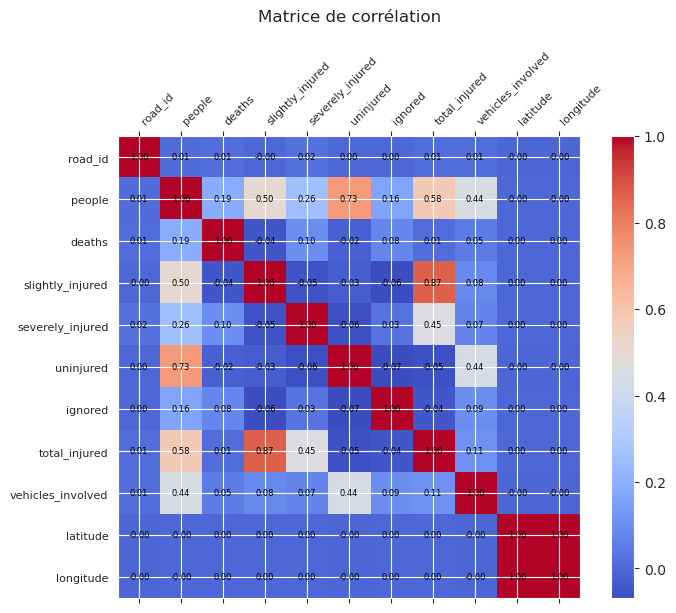

In [3]:
'''
Traitement data
'''

# Charger les données
data = pd.read_csv('./dataset/accidents.csv')

# Conserver les colonnes numériques
df_numeric = data.select_dtypes(exclude=['object'])

# Gérer les valeurs manquantes
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Normalisation uniquement des colonnes numériques
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = df_numeric.columns
scaler = MinMaxScaler()
df_numeric_normalized = scaler.fit_transform(df_numeric)

# Matrice de corrélation pour les colonnes numériques uniquement
matrix_correlation = pd.DataFrame(df_numeric_normalized, columns=columns_to_normalize).corr()

# Visualisation de la matrice de corrélation
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(matrix_correlation, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(matrix_correlation.columns)))
ax.set_yticks(range(len(matrix_correlation.columns)))
ax.set_xticklabels(matrix_correlation.columns, fontsize=8)
ax.set_yticklabels(matrix_correlation.columns, fontsize=8)
plt.xticks(rotation=45, ha='left')

for (i, j), val in np.ndenumerate(matrix_correlation.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=6)

plt.title("Matrice de corrélation", pad=20)
plt.show()


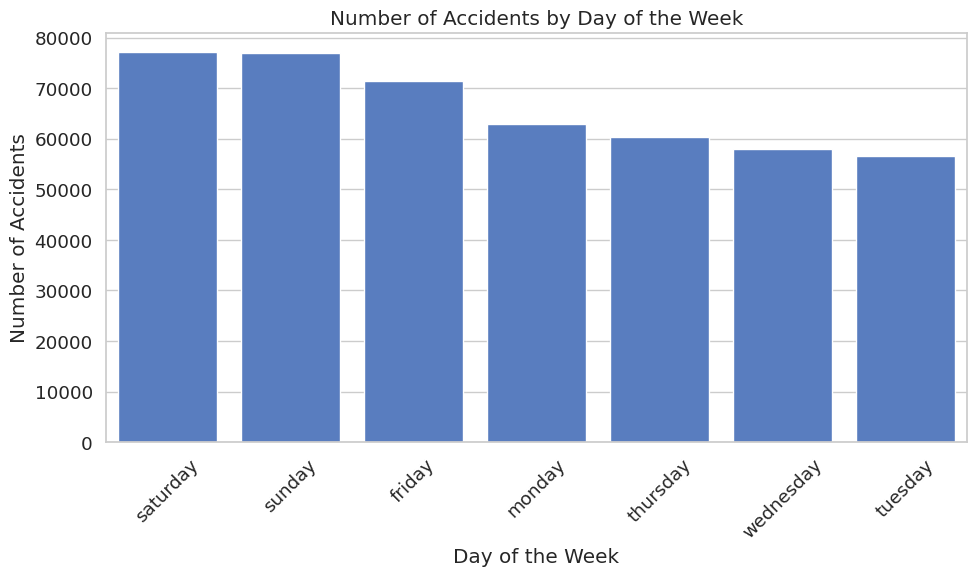

/tmp/ipykernel_6658/746797286.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")


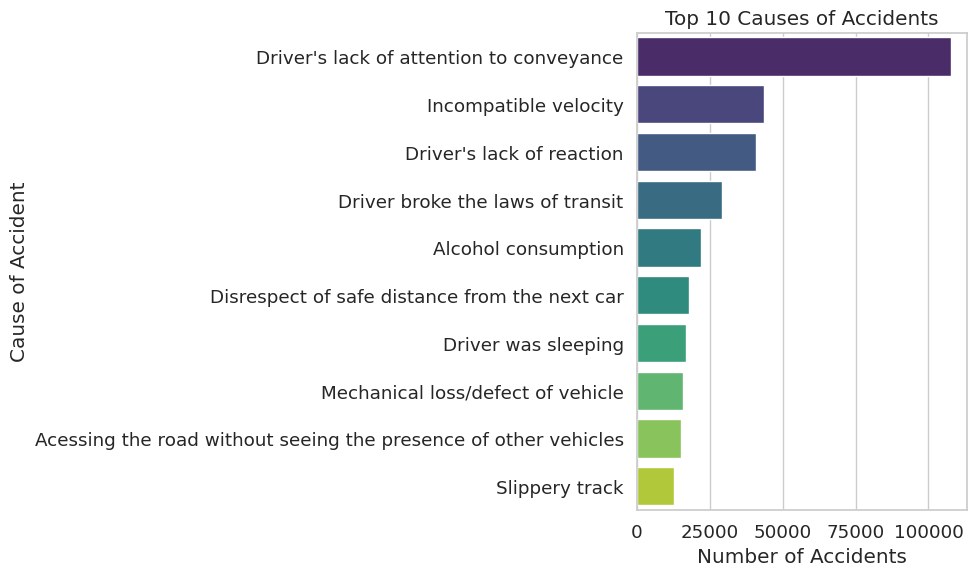

/tmp/ipykernel_6658/746797286.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='wheather_condition', order=data['wheather_condition'].value_counts().index, palette="coolwarm")


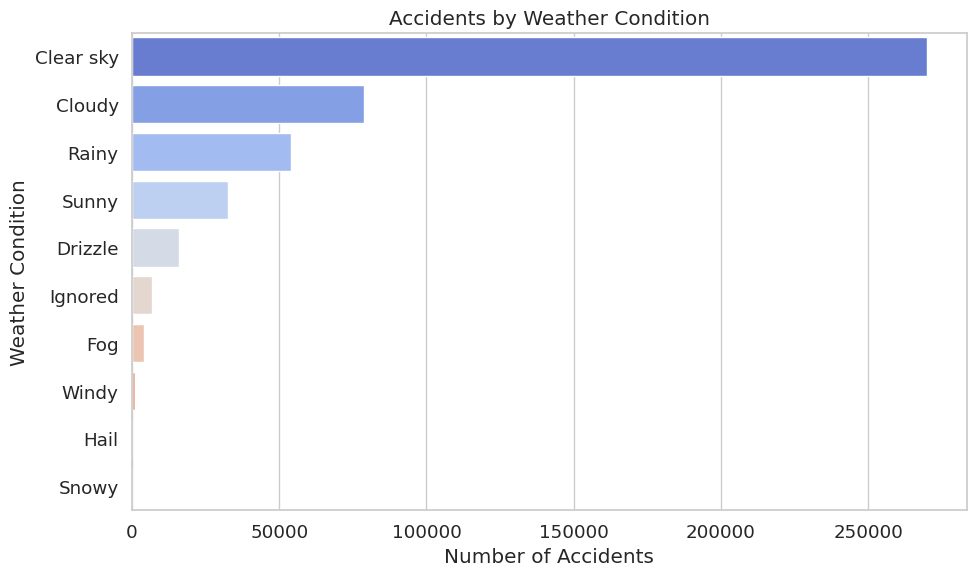

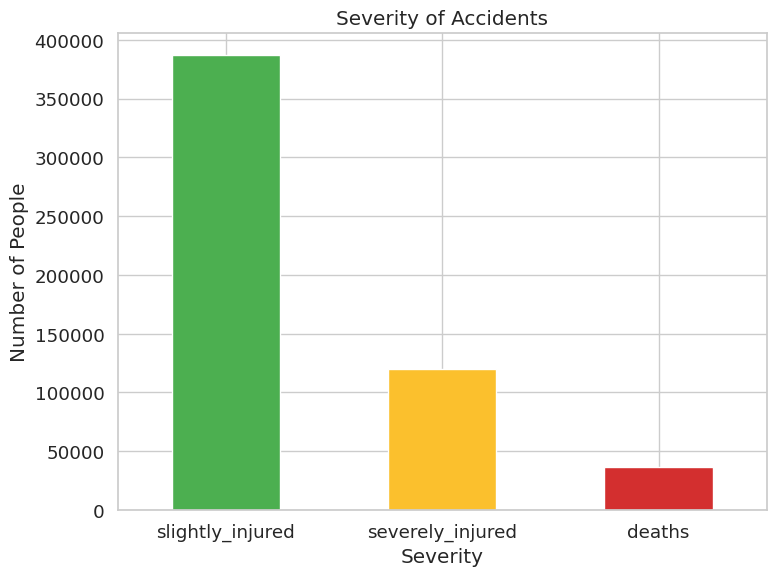

In [4]:
'''
VISUALISATION DES DONNEES
'''

# Configure styles for better visualization
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='week_day', order=data['week_day'].value_counts().index)
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Causes of accidents (top 10 most frequent causes)
plt.figure(figsize=(10, 6))
top_causes = data['cause_of_accident'].value_counts().head(10)
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Causes of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause of Accident")
plt.tight_layout()
plt.show()

# Weather conditions during accidents
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='wheather_condition', order=data['wheather_condition'].value_counts().index, palette="coolwarm")
plt.title("Accidents by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# Distribution of accident severity (slightly injured, severely injured, deaths)
severity_columns = ['slightly_injured', 'severely_injured', 'deaths']
severity_counts = data[severity_columns].sum()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color=['#4caf50', '#fbc02d', '#d32f2f'])
plt.title("Severity of Accidents")
plt.ylabel("Number of People")
plt.xlabel("Severity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Statistiques des cibles :
       slightly_injured  severely_injured         deaths
count     463152.000000     463152.000000  463152.000000
mean           0.013696          0.008372       0.003773
std            0.017627          0.019446       0.015818
min            0.000000          0.000000       0.000000
25%            0.000000          0.000000       0.000000
50%            0.016393          0.000000       0.000000
75%            0.016393          0.000000       0.000000
max            1.000000          1.000000       1.000000

Variance des cibles :
slightly_injured    0.000311
severely_injured    0.000378
deaths              0.000250
dtype: float64
Types de données après conversion des booléens :
road_id                              float64
people                               float64
deaths                               float64
slightly_injured                     float64
severely_injured                     float64
uninjured                            float64
ignored          

/tmp/ipykernel_6658/3286753965.py:84: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


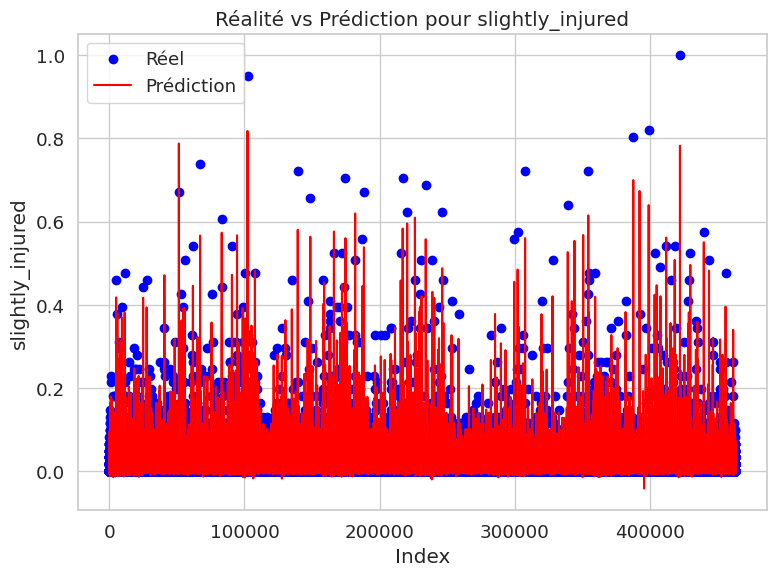

/home/kery/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


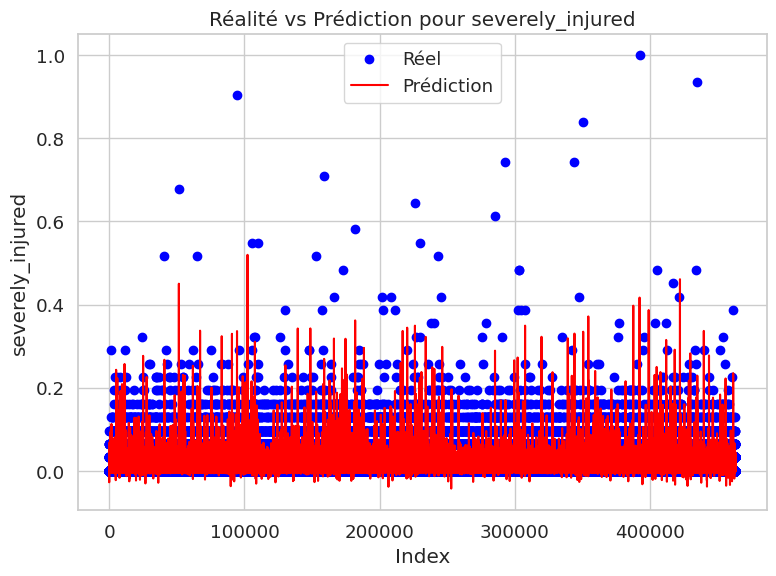

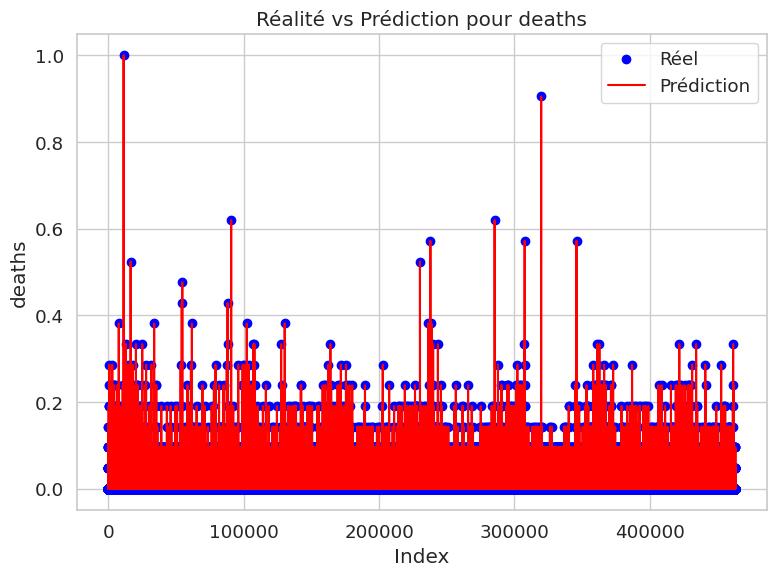

In [6]:
'''
REGRESSION LINEAIRE ANALYTIQUE
'''

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Encodage manuel pour les colonnes catégoriques
categorical_columns = ['road_delineation', 'road_type', 'wheather_condition', 'weather_timestamp']
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)

# Conserver les colonnes numériques et gérer les valeurs manquantes
df_numeric = data.select_dtypes(exclude=['object'])

# Concaténer les données encodées et numériques
final_data = pd.concat([df_numeric.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)

# Normalisation manuelle des colonnes numériques
numeric_columns = df_numeric.columns
final_data[numeric_columns] = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

severity_columns = ['slightly_injured', 'severely_injured', 'deaths']
severity_stats = final_data[severity_columns].describe()

# Calculer la variance
variance = final_data[severity_columns].var()

print("Statistiques des cibles :")
print(severity_stats)

# Afficher la variance
print("\nVariance des cibles :")
print(variance)


# Régression manuelle : prédiction des cibles (exemple d'approche analytique)
def linear_regression_predict(X, beta):
    return np.dot(X, beta)

# Étape 10.2 : Conversion des colonnes booléennes en float
final_data = final_data.astype({col: 'float64' for col in final_data.select_dtypes(include=['bool']).columns})

# Vérifier à nouveau les types de données après conversion
print("Types de données après conversion des booléens :")
print(final_data.dtypes)

# Étape 10.3 : Retirer les lignes avec des valeurs NaN (éventuellement créées lors de la conversion)
final_data = final_data.dropna()

# Étape 10.4 : Construction de X et Y pour la régression
severity_columns = ['slightly_injured', 'severely_injured', 'deaths']
X = final_data.drop(severity_columns, axis=1).values
Y = final_data[severity_columns].values

# Ajouter une colonne pour l'intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Régression analytique
try:
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    print("Coefficients calculés :", beta)
except np.linalg.LinAlgError as e:
    print("Erreur lors du calcul des coefficients :", e)

# Prédictions
Y_pred = linear_regression_predict(X, beta)

# Calcul des erreurs
errors = Y - Y_pred
mse = (errors ** 2).mean(axis=0)
print("MSE pour chaque colonne cible :", mse)

# Visualisation des résultats de la régression
for i, column in enumerate(severity_columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(final_data.index, Y[:, i], color='blue', label='Réel')
    plt.plot(final_data.index, Y_pred[:, i], color='red', label='Prédiction')
    plt.title(f"Réalité vs Prédiction pour {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()
